# Describing Distributions (Core)
- Martisha Owens
- 11/28/2022

## The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

In [3]:
filename = 'Medical_dataset.csv'
df = pd.read_csv(filename)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


# Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

In [22]:
def histogram(col):
    feature = df[col]

    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    minus_one_std = mean - std
    plus_one_std = mean + std
    
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature, ax=ax, stat='probability', kde = True)

    ax.axvline(mean, color = 'red', label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvspan(minus_one_std, plus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend()
    
    kurt = stats.kurtosis(feature, fisher = False)
    print(f'Kurtosis: {kurt}');

## VitD_levels 
- The histogram is Continuous
- The Mean and Median are fairly close to each other and the mode is slightly larger than both. I would say it is not skewed. At worst it is marginally negatively skewed.
- The kurtosis is ~3 so it is essentially a normal distribution, Mesokurtic.

Kurtosis: 3.013147515833447


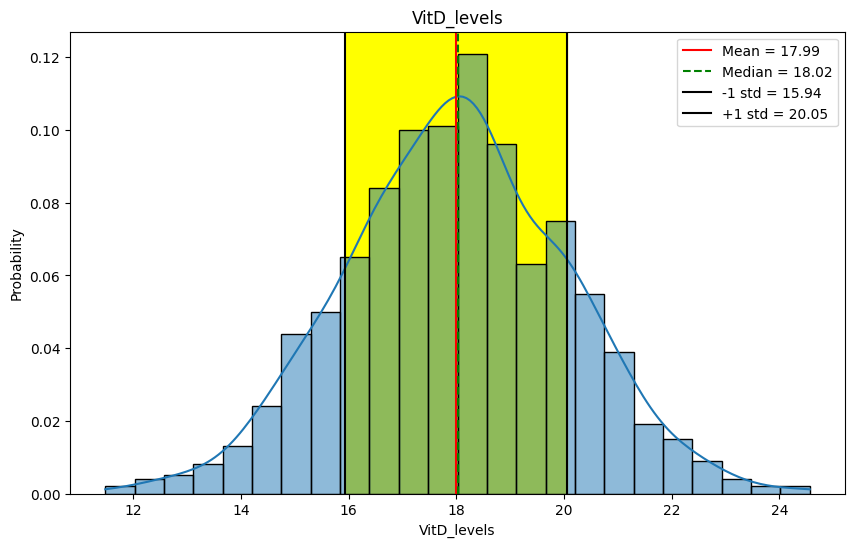

In [19]:
histogram('VitD_levels')

## Doc_visits
- The histogram is Discrete.
- The Mean, Median, and Mode are all aligned. It is not skewed.
- The kurtosis is ~3 so it is essentially a normal distribution, Mesokurtic.

Kurtosis: 2.9919958083381206


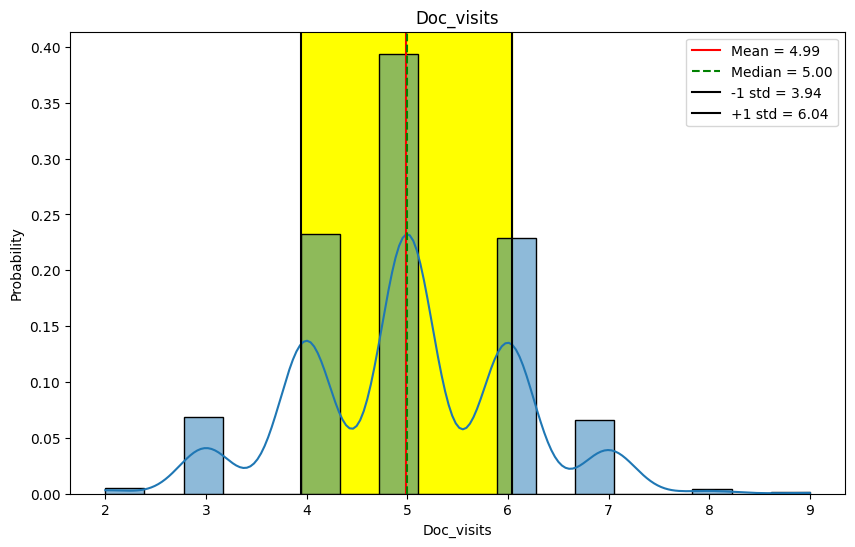

In [20]:
histogram('Doc_visits')

## TotalCharge
- The histogram is Continuous.
- The Mean is greater than the Median and the Mode. It is positively skewed. 
- The kurtosis is ~3.27, which indicates that it is positive or Leptokurtic. 

Kurtosis: 3.2650077463439384


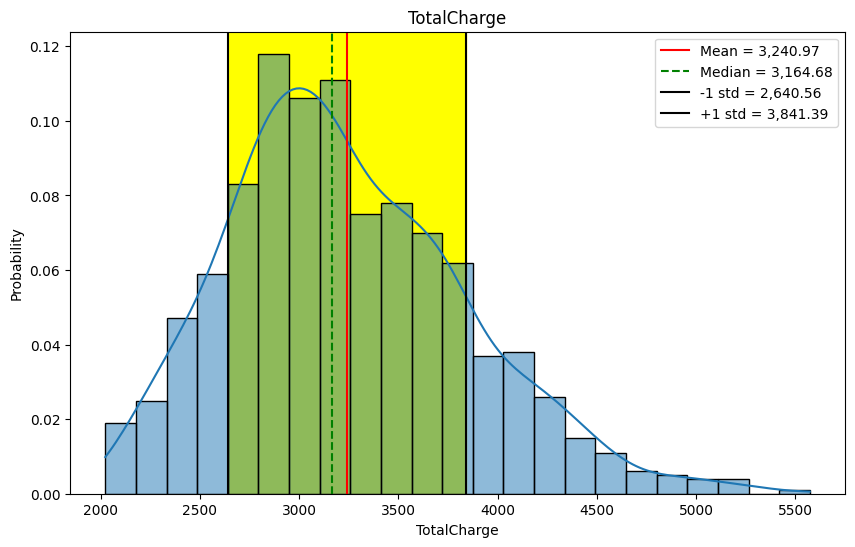

In [21]:
histogram('TotalCharge')